Base Distritbution


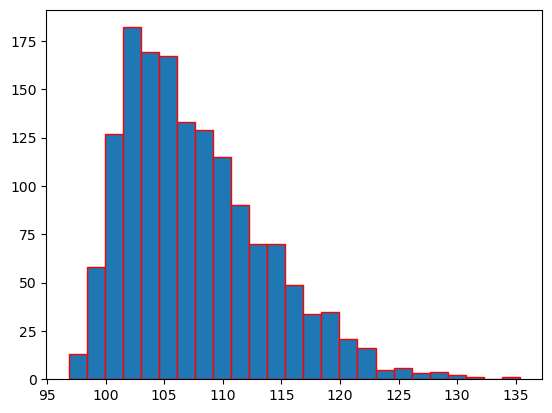

In [41]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import sklearn.preprocessing
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns

np.random.seed(123)

x = stats.skewnorm(7).rvs(1500) * 10 + 100
x = x.reshape(-1, 1)

plt.hist(x, bins=25,ec='red')
print('Base Distritbution')

# Split Data

In [8]:
x_train_and_validate, x_test = train_test_split(x, random_state=123)
x_train, x_validate = train_test_split(x_train_and_validate)

# Min Max Scaling

Text(0.5, 1.0, 'Scaled')

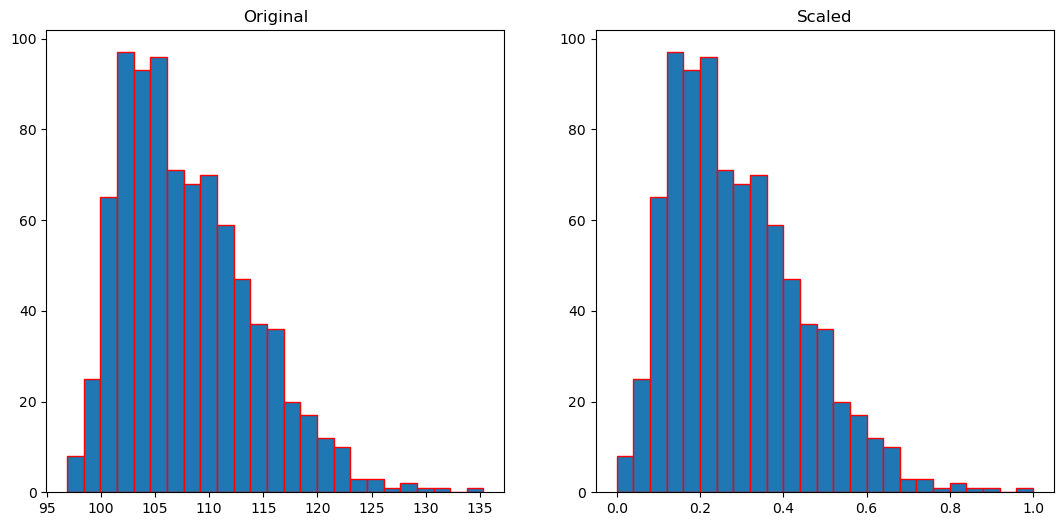

In [12]:
scaler = sklearn.preprocessing.MinMaxScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='red')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='red')
plt.title('Scaled')

# Standard Scaler

Text(0.5, 1.0, 'Scaled')

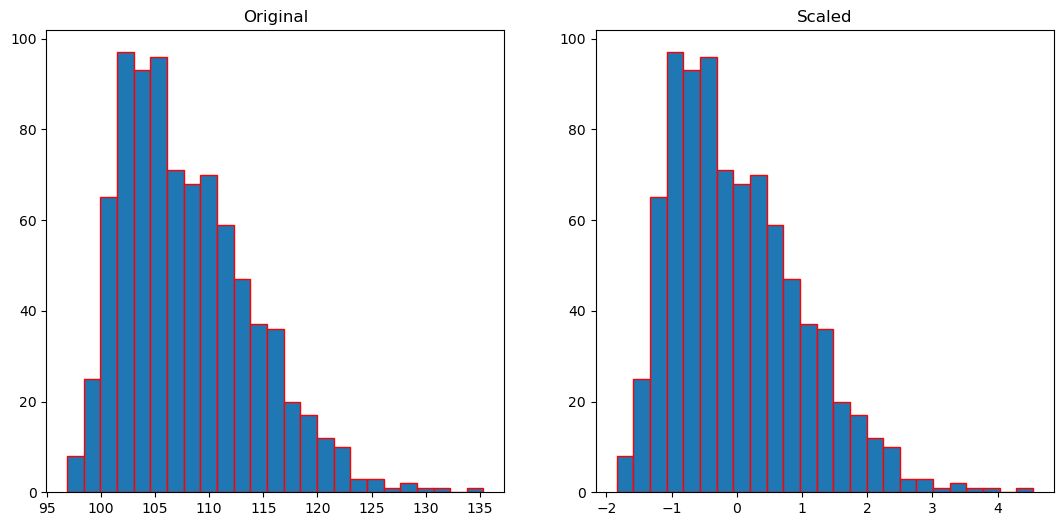

In [11]:
scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, ec='red')
plt.title('Original')
plt.subplot(122)
plt.hist(x_train_scaled, bins=25, ec='red')
plt.title('Scaled')

# Robust Scaler

Text(0.5, 1.0, 'Scaled')

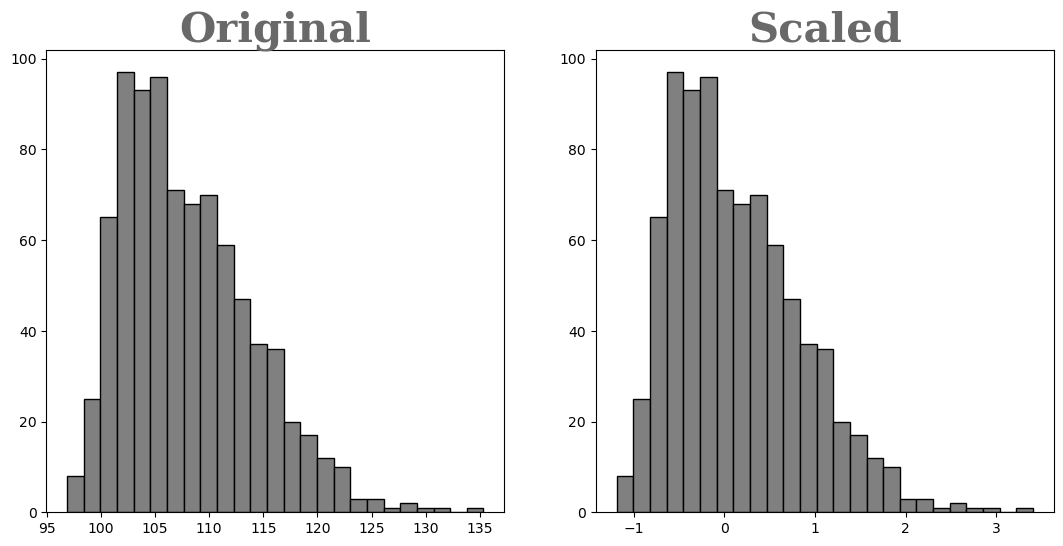

In [26]:
scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
scaler.fit(x_train)

x_train_scaled = scaler.transform(x_train)
x_validate_scaled = scaler.transform(x_validate)
x_test_scaled = scaler.transform(x_test)

font = {'family': 'serif',
        'color':  'dimgray',
        'weight': 'bold',
        'size': 30,
        }

plt.figure(figsize=(13, 6))
plt.subplot(121)
plt.hist(x_train, bins=25, color='gray',ec='black')
plt.title('Original', fontdict=font)

plt.subplot(122)
plt.hist(x_train_scaled, color='gray', bins=25, ec='black')
plt.title('Scaled', fontdict=font)

# Using Auto DataFrame

In [30]:
auto_df = pd.read_fwf("auto-mpg.data",header=None)

In [31]:
auto_df.head()

,0,1,2,3,4,5,6,7,8
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


mpg\
cylinders\
displacement\
horsepower\
weight\
acceleration\
model year\
origin\
car name

In [33]:
auto_df.columns = ['mpg',
'cylinders',
'displacement',
'horsepower',
'weight',
'acceleration',
'model_year',
'origin',
'name']

In [35]:
auto_df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""


In [37]:
auto_df.shape

(398, 9)

In [39]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [48]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

In [52]:
auto_df = auto_df[auto_df['horsepower'] != '?']

In [136]:
auto_df['horsepower'] = auto_df['horsepower'].astype('float')

/var/folders/_r/wftd7dk93nj_hbzpqfw4vnsr0000gn/T/ipykernel_19695/1313644909.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  auto_df['horsepower'] = auto_df['horsepower'].astype('float')


In [137]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight          float64
acceleration    float64
model_year        int64
origin            int64
name             object
dtype: object

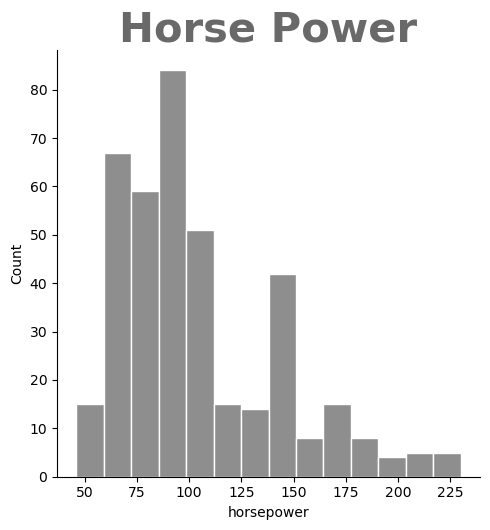

In [138]:
sns.displot(auto_df['horsepower'],color='dimgray',ec='white')
font = {'family': 'sans serif',
        'color':  'dimgray',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Horse Power', fontdict=font)
plt.show()

In [134]:
auto_df_train, auto_df_test = train_test_split(auto_df, train_size=.7,random_state=123)
auto_df_train.shape, auto_df_test.shape

((274, 9), (118, 9))

# Min Max Scaler

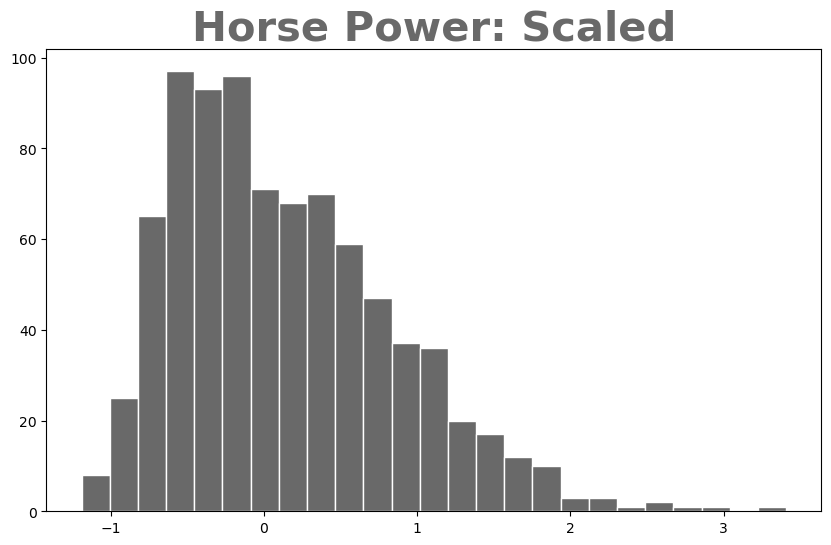

In [133]:
auto_df_scaler = sklearn.preprocessing.MinMaxScaler()

auto_df_scaler.fit(auto_df_train[['horsepower']])

auto_df_train_scaled = auto_df_scaler.transform(auto_df_train[['horsepower']])

plt.figure(figsize=(10, 6))
plt.hist(x_train_scaled, bins=25,color='dimgray',ec='white')
font = {'family': 'sans serif',
        'color':  'dimgray',
        'weight': 'bold',
        'size': 30,
        }
plt.title('Horse Power: Scaled', fontdict=font)
plt.show()

In [132]:
auto_df_train['horsepower'].head()

5      198.0
237     63.0
335     88.0
19      46.0
29      88.0
Name: horsepower, dtype: float64

In [131]:
auto_df_train_scaled[:5]

array([[ 2.50120503],
       [-1.03115501],
       [-0.37701426],
       [-1.47597072],
       [-0.37701426]])

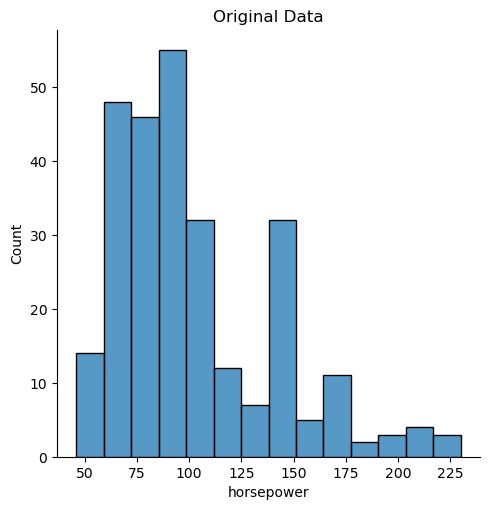

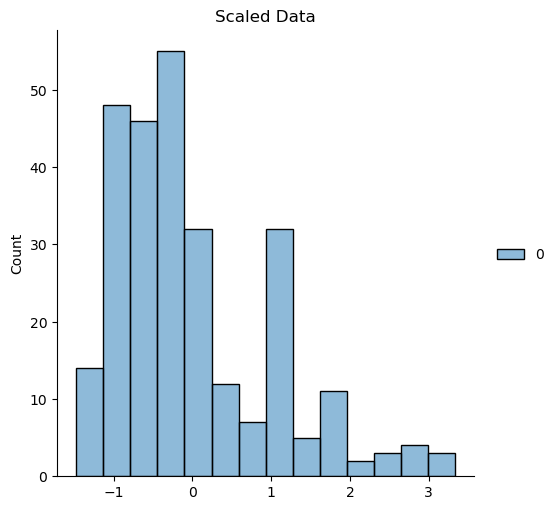

In [130]:
sns.displot(auto_df_train['horsepower'])
plt.title('Original Data')


sns.displot(auto_df_train_scaled)
plt.title('Scaled Data')
plt.show()

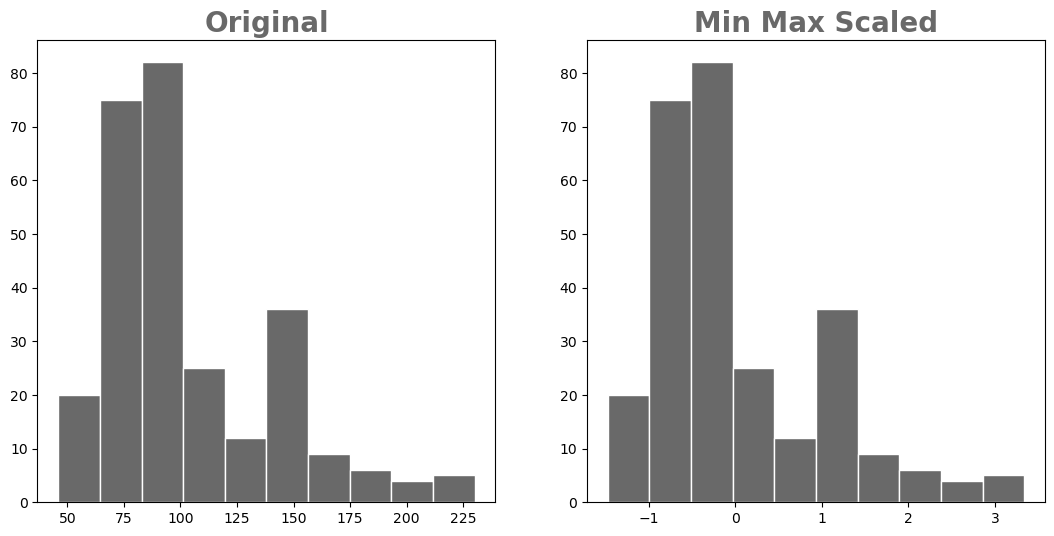

In [128]:
font = {'family': 'sans serif',
        'color':  'dimgray',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(auto_df_train['horsepower'],color='dimgray',ec='white')
plt.title('Original', fontdict=font)

plt.subplot(122)
plt.hist(auto_df_train_scaled,color='dimgray',ec='white')
plt.title('Min Max Scaled', fontdict=font)
plt.show()

# Standard Scaler

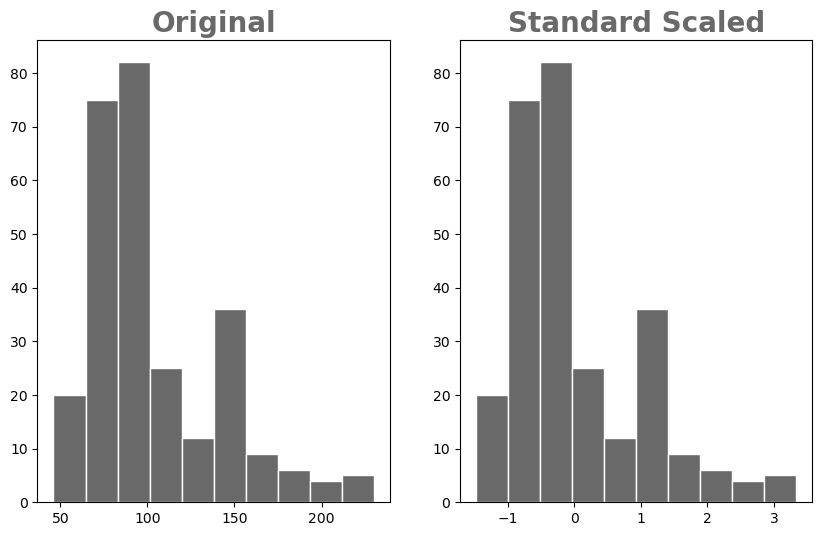

In [126]:
# Scaling
# =======
auto_df_scaler = sklearn.preprocessing.StandardScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
auto_df_scaler.fit(auto_df_train[['horsepower']])
auto_df_train_scaled = auto_df_scaler.transform(auto_df_train[['horsepower']])

# Plotting
# ========
font = {'family': 'sans serif',
        'color':  'dimgray',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(10, 6))

plt.subplot(121)
plt.hist(auto_df_train['horsepower'],color='dimgray',ec='white')
plt.title('Original', fontdict=font)

plt.subplot(122)
plt.hist(auto_df_train_scaled,color='dimgray',ec='white')
plt.title('Standard Scaled', fontdict=font)

plt.show()

# Robust Scaler

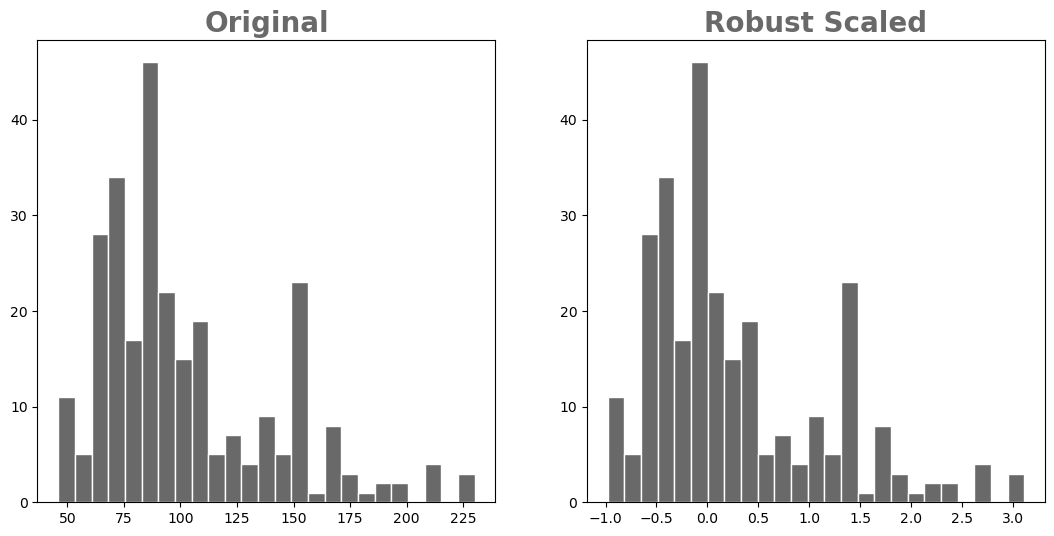

In [139]:
# Scaler
# ======
auto_df_scaler = sklearn.preprocessing.RobustScaler()
# Note that we only call .fit with the training data,
# but we use .transform to apply the scaling to all the data splits.
auto_df_scaler.fit(auto_df_train[['horsepower']])

auto_df_train_scaled = auto_df_scaler.transform(auto_df_train[['horsepower']])

# Plotting
# ========
font = {'family': 'sans serif',
        'color':  'dimgray',
        'weight': 'bold',
        'size': 20,
        }

plt.figure(figsize=(13, 6))

plt.subplot(121)
plt.hist(auto_df_train['horsepower'],bins=25,color='dimgray',ec='white')
plt.title('Original', fontdict=font)
plt.subplot(122)
plt.hist(auto_df_train_scaled,bins=25,color='dimgray',ec='white')
plt.title('Robust Scaled', fontdict=font)
plt.show()

# Fitting More Than One Variable

In [118]:
auto_df_scaler = sklearn.preprocessing.RobustScaler()

In [119]:
auto_df_scaler.fit(auto_df_train[['horsepower','weight']])

RobustScaler()

In [120]:
double_trouble = auto_df_scaler.transform(auto_df_train[['horsepower','weight']])
double_trouble[:10]

array([[ 2.4       ,  1.14860295],
       [-0.6       , -0.48158035],
       [-0.04444444, -0.16195053],
       [-0.97777778, -0.63534437],
       [-0.04444444, -0.42534259],
       [-0.46666667, -0.38334223],
       [-0.33333333, -0.26873109],
       [-0.02222222,  0.01957644],
       [ 0.06666667, -0.2395444 ],
       [ 0.        ,  0.25449368]])

In [121]:
auto_df_scaler.fit(auto_df_train[['horsepower']])

RobustScaler()

In [122]:
auto_df_train_scaled = auto_df_scaler.transform(auto_df_train[['horsepower']])

In [123]:
auto_df_train_scaled[:10]

array([[ 2.4       ],
       [-0.6       ],
       [-0.04444444],
       [-0.97777778],
       [-0.04444444],
       [-0.46666667],
       [-0.33333333],
       [-0.02222222],
       [ 0.06666667],
       [ 0.        ]])